# Logistic Regression on Small Digits Dataset

### Loading the Data

The small digits dataset is available in sklearn.

<ins>Note:</ins>
sklearn.datasets är exempel på data för att man ska lära sig sklearn algoritmer

In [1]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

Lets check the format of the data

In [2]:
# There are 1797 images (8 by 8 images, stored in vectors)
print("Image Data Shape" , digits.data.shape)
# 1797 labels (0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Show typical Images and Labels

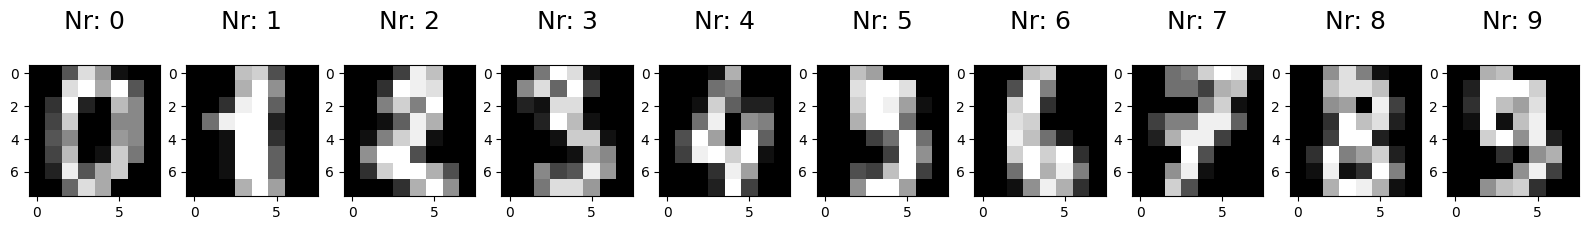

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Nr: %i\n' % label, fontsize = 18)

### Split Data into Training and Test **Sets**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

[[ 0.  0.  2. ...  0.  0.  0.]
 [ 0.  5. 16. ...  6.  1.  0.]
 [ 0.  0.  4. ...  2.  0.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]]


### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the logistic regression method
Initiate an instance with some parameters

<ins>Note:</ins>
<strong>C:</strong> Regulariserings styrka
<strong>tol:</strong> Tolerans på stopping kriteriet

In [5]:
from sklearn.linear_model import LogisticRegression
# Experiment with other parameters until you get something that works fine
logitmodel = LogisticRegression(max_iter=10,tol=1,C=0.0001)

**Step 2.** Train the model on the data

In [6]:
logitmodel.fit(x_train, y_train)

LogisticRegression(C=0.0001, max_iter=10, tol=1)

In [7]:
# Calculate accuracy (Enew)
score = logitmodel.score(x_test, y_test)
print('{0:.4f}'.format(score))

0.8800


**Step 3.** Predict the labels of new images

In [9]:
# Make Predictions on Test Data and compare with truth
predictions = logitmodel.predict(x_test)
print(predictions[120:150])
print(y_test[120:150])

[2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 3]
[2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 3]


### Confusion Matrix (Digits Dataset)

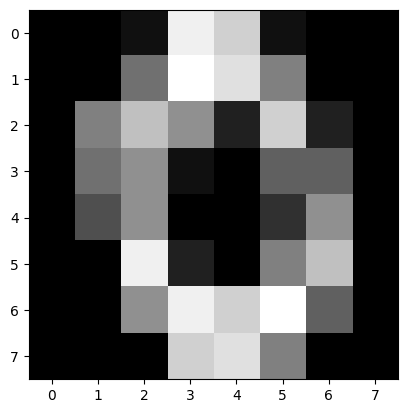

In [13]:
plt.imshow(np.reshape(x_test[140,:], (8,8)), cmap=plt.cm.gray)

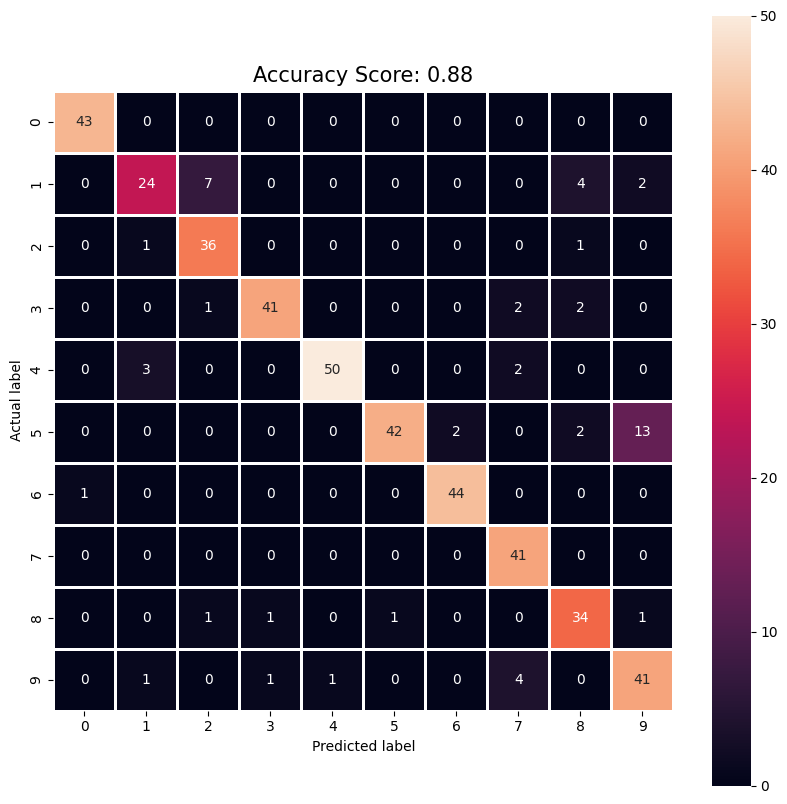

In [15]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);
#plt.savefig('smalldigits.png')
#plt.show();

In [33]:
# Find the image corresponding to a mis-classified digit:
# insert code here

rows = np.arange(0,len(cm[0]),1).tolist()
columns = np.arange(0,len(cm),1).tolist()
print(rows, columns)

wrong_digits = []
for row in rows:
    for column in columns:
        if row == column:
            pass
        else:
            if not cm[row][column] == 0:
                wrong_digits.append((row, column))

print(wrong_digits)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(1, 2), (1, 8), (1, 9), (2, 1), (2, 8), (3, 2), (3, 7), (3, 8), (4, 1), (4, 7), (5, 6), (5, 8), (5, 9), (6, 0), (8, 2), (8, 3), (8, 5), (8, 9), (9, 1), (9, 3), (9, 4), (9, 7)]
